# Regression Project

In [1]:
#imports
import pandas as pd
import numpy as np

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score, mean_squared_error

from sklearn.feature_selection import f_regression
from scipy.stats import pearsonr, spearmanr

from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle as w
import explore as e

import warnings
warnings.filterwarnings("ignore")

# Acquire

* Data acquired from Codeup database
* 5 columns and 52441 rows before cleaning
* Each row is a single property
* Each column contains information about the properties

In [2]:
# acquire the data
df = w.get_zillow_data()

In [3]:
# check the shape of df
df.shape

(52441, 5)

In [4]:
# take a peek
df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,fips
0,3.5,4.0,3100.0,1023282.0,6059.0
1,1.0,2.0,1465.0,464000.0,6111.0
2,2.0,3.0,1243.0,564778.0,6059.0
3,3.0,4.0,2376.0,145143.0,6037.0
4,3.0,4.0,2962.0,773303.0,6037.0


In [5]:
# check for nulls
df.isnull().sum()

bathroomcnt                      0
bedroomcnt                       0
calculatedfinishedsquarefeet    82
taxvaluedollarcnt                1
fips                             0
dtype: int64

In [6]:
# calculate percent of data loss from dropping nulls
(83 / 52441) * 100

0.1582731069201579

In [7]:
# see the unique values for the fips column
df.fips.unique()

array([6059., 6111., 6037.])

## Prepare

   * Rename the columns
   * Change the data types of certain columns
   * Rename the FIPS values to county for easier readability.
   * Drop the null values.
       * Nulls accounted for 0.15% of the data so I felt the best route was to simply drop them.
   * Drop outliers which skewed the data.
       * Outliers were determined using the IQR.
           * Since none of the features or target were normally distributed, the square root of the mean was calculated for variance.
       * Values for all columns that fell outside of their respective fences were dropped.
       
   * Scale the data.
   * Split the data into train, validate, split in a 50, 30, 20 split.

In [8]:
# clean the data
df = w.clean_zillow(df)

In [9]:
# take a peek
df.head()

,bathcount,bedcount,sqfeet,value,county
0,3.5,4.0,3100,1023282.0,Orange
1,1.0,2.0,1465,464000.0,Ventura
2,2.0,3.0,1243,564778.0,Orange
3,3.0,4.0,2376,145143.0,Los Angeles
4,3.0,4.0,2962,773303.0,Los Angeles


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49652 entries, 0 to 52440
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bathcount  49652 non-null  float64
 1   bedcount   49652 non-null  float64
 2   sqfeet     49652 non-null  int64  
 3   value      49652 non-null  float64
 4   county     49652 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 2.3+ MB


In [11]:
# calculate the IQR for respective columns

#q3, q1 = np.percentile(df.bathcount, [75, 25])
#iqr = q3 - q1        

In [12]:
# finding the standard deviation of bathcount with a poisson distribution
#(df.bathcount.mean()) ** .5

In [13]:
# remove the values
#df = df[~((df['bathcount']<(q1-1.5*iqr)) | (df['bathcount']>(q3+1.5*iqr)))]

In [14]:
# check that it worked correctly
#df.bathcount.unique()

In [15]:
# calculate the IQR for respective columns

#q3, q1 = np.percentile(df.bedcount, [75, 25])
#iqr = q3 - q1

#iqr, q1, q3

In [16]:
# finding the standard deviation of bathcount with a poisson distribution
#(df.bedcount.mean()) ** .5

In [17]:
# remove the values
#df = df[~((df['bedcount']<(q1-1.8*iqr)) | (df['bedcount']>(q3+1.8*iqr)))]

In [18]:
# check that it worked correctly
#df.bedcount.unique()

In [19]:
# calculate the IQR for respective columns

#q3, q1 = np.percentile(df.sqfeet, [75, 25])
#iqr = q3 - q1

#iqr, q1, q3

In [20]:
# finding the standard deviation of bathcount with a poisson distribution
#(df.sqfeet.mean()) ** .5

In [21]:
# remove the values
#df = df[~((df['sqfeet']<(q1-42*iqr)) | (df['sqfeet']>(q3+42*iqr)))]

In [22]:
# calculate the IQR for respective columns

#q3, q1 = np.percentile(df.value, [75, 25])
#iqr = q3 - q1

#iqr, q1, q3

In [23]:
# finding the standard deviation of bathcount with a poisson distribution
#(df.value.mean()) ** .5

In [24]:
# remove the values
#df = df[~((df['value']<(q1-684*iqr)) | (df['value']>(q3+684*iqr)))]

In [25]:
# check the data
df.shape

(49652, 5)

In [26]:
# split the data

train, validate, test = w.split_zillow(df)

In [27]:
# save the string columns for later
train_county = train.county
validate_county = validate.county
test_county = test.county

# Explore
* Answer the questions:
    * Is the county the property located related to the value?
    * Is bedroom count related to home value?
    * Is bathroom count related to home value?
    * Are bedroom count and bathroom count related to one another? Can they be combined as a feature?
    * Is square footage of the property related to home value?

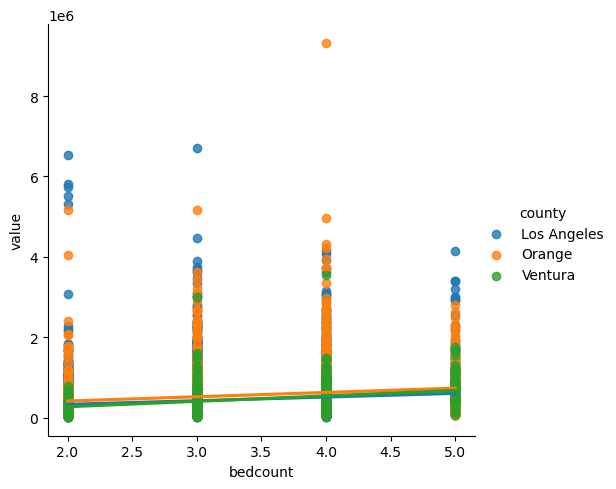

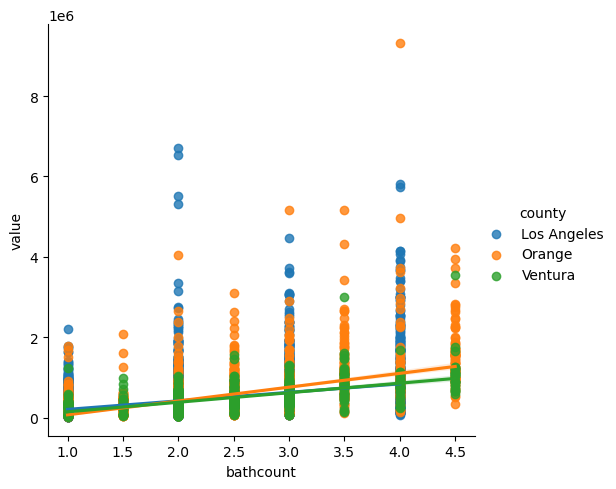

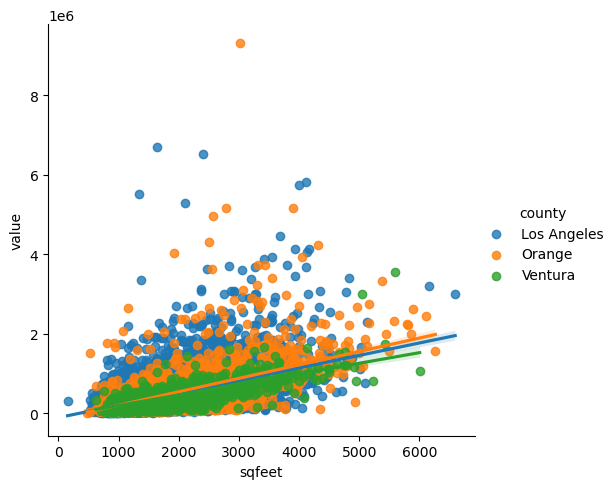

In [28]:
# take a look at all of our continuous data
e.plot_variable_pairs(train)

### Is the county the property is located related to the home value?

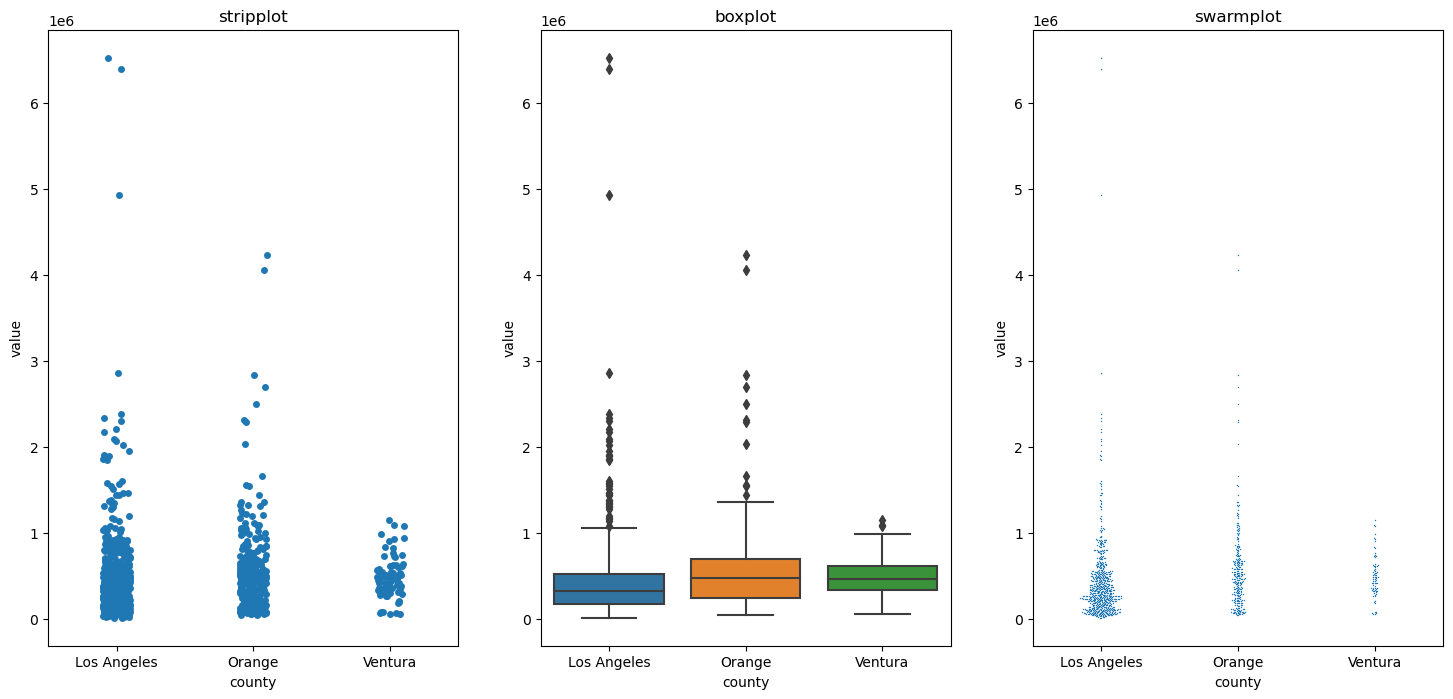

In [29]:
# check our categorical feature
e.plot_categorical_and_continuous_vars(train, 'county', 'value')

### Is bedroom count related to home value?

$H_0$: Bedroom count is not correlated to home value.

$H_A$: Bedroom count is correlated to home value.

<Axes: >

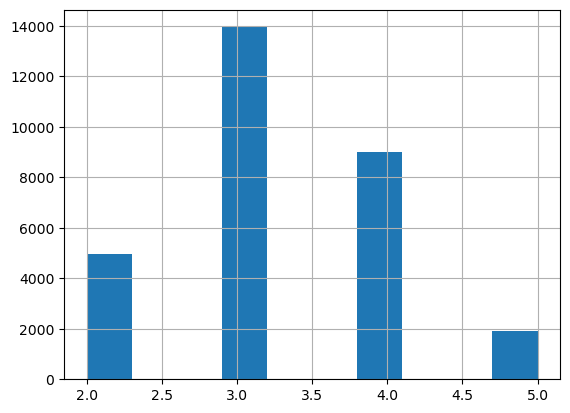

In [30]:
train.bedcount.hist()

There is a relationship between bedroom count and home value.

There is a somewhat normal distribution so we will test correlation with the Pearson R correlation test. 

The p is low so we reject the null hypothesis.

In [31]:
r, p = pearsonr(train.bedcount, train.value)

print('r:', r)
print('p:', p)

r: 0.1991870293144311
p: 3.157258177158552e-264


### Is bathroom count related to home value?

$H_0$: Bathroom count is not correlated to home value.

$H_A$: Bathroom count is correlated to home value.

<Axes: >

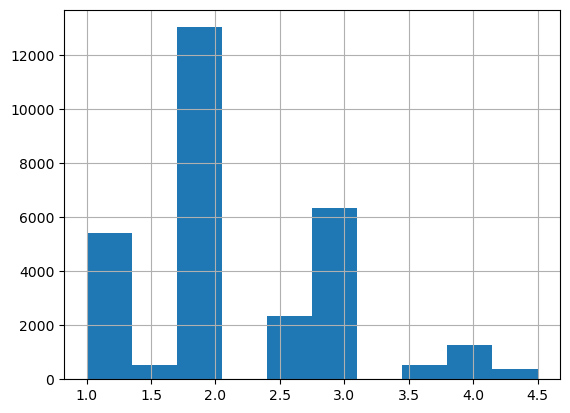

In [32]:
train.bathcount.hist()

There is a relationship between bathroom count and home value.

There is not a normal distribution so we will test correlation with the Spearman R correlation test. 

The p is low so we reject the null hypothesis.

In [33]:
r, p = spearmanr(train.bathcount, train.value)

print('r:', r)
print('p:', p)

r: 0.4468020123552291
p: 0.0


### Is square footage related to home value?

$H_0$: Square footage is not correlated to home value.

$H_A$: Bathroom count is correlated to home value.

<Axes: >

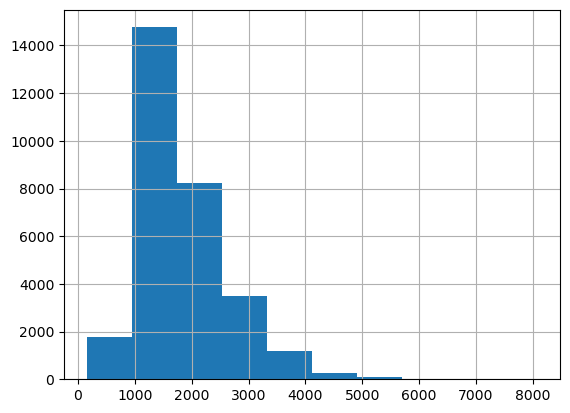

In [34]:
train.sqfeet.hist()

There is a relationship between square footage and home value.

There is not a normal distribution so we will test correlation with the Spearman R correlation test. 

The p is low so we reject the null hypothesis.

In [35]:
r, p = spearmanr(train.sqfeet, train.value)

print('r:', r)
print('p:', p)

r: 0.49228078390490704
p: 0.0


## Exploration Summary

   * There is a slight difference across all features between the three different counties.
       * Los Angeles County has a higher amount of lower value homes.
       * Ventura County has fewer amount of high value homes.
        * May be worthwhile to seperate the data by counties.
   * Square footage has the strongest regression line of all three.
   * Bedroom count, bathroom count, square footage are correlated with home value.


# Modeling

   * I will use RMSE as an evaluation metric.
   * Baseline will be the mean of 'value'.

In [36]:
# split the data for modeling

X_train, y_train, X_validate, y_validate, X_test, y_test = w.zillow_model_split(train, validate, test)

In [37]:
# change the target to databases 

y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [38]:
# add the mean baseline to the db
value_pred_mean = y_train.value.mean()
y_train['value_pred_mean'] = value_pred_mean
y_validate['value_pred_mean'] = value_pred_mean

In [39]:
# RMSE of baseline
rmse_train = mean_squared_error(y_train.value, y_train.value_pred_mean) ** (.5)

rmse_validate = mean_squared_error(y_validate.value, y_validate.value_pred_mean) ** (.5)

In [40]:
# check it out
y_train.head()

,value,value_pred_mean
19073,819623.0,469210.235079
45409,178650.0,469210.235079
48578,52771.0,469210.235079
34163,91117.0,469210.235079
42494,330453.0,469210.235079


In [41]:
# create a df to easily view results of models
metric_df = pd.DataFrame(data = [
        {
            'model': "mean_baseline",
            'RMSE_train': rmse_train,
            'RMSE_validate': rmse_validate,
            'R2_validate': explained_variance_score(y_validate.value, y_validate.value_pred_mean)
        }
])

In [42]:
# check it out
metric_df.head()

,model,RMSE_train,RMSE_validate,R2_validate
0,mean_baseline,463071.93546,457259.804722,0.0


In [43]:
# run the models and compare the metrics to see the best performing one
y_train, y_validate, metric_df = e.ols_lasso_tweedie(X_train, X_validate, y_train, y_validate, metric_df)

RMSE for OLS using LinearRegression
        Training/In-Sample:  388141.87 
        Validation/Out-of-Sample: 381735.52

RMSE for LassoLars
        Training/In-Sample:  388141.87 
        Validation/Out-of-Sample: 381735.52

RMSE for TweedieRegressor
        Training/In-Sample:  463071.94 
        Validation/Out-of-Sample: 457259.80



In [44]:
# see the R^2 of each model
metric_df

,model,RMSE_train,RMSE_validate,R2_validate
0,mean_baseline,463071.935460,457259.804722,0.000000e+00
1,ols,388141.871095,381735.524332,3.029287e-01
2,lasso_alpha0.03,388141.871096,381735.523497,3.029287e-01
3,tweedie_power1_alpha1.0,463071.935460,457259.804722,1.110223e-16


   * LassoLars and OLS were the best performing models with an RMSE of approx 229,394 with and $R^2$ of approx 25%.
   
   * Tweedie barely performed better than baseline.
   
   * I will move forward with the LassoLars (alpha = 0.03) model.

### LassoLars Model on Test Data

In [48]:
# drop county column for x_test
X_test = X_test.drop(columns='county')

In [49]:
# make and fit the model
lars = LassoLars(alpha = 0.03)
LarsModel = lars.fit(X_train, y_train.value)

# predict with test data
y_test_pred = lars.predict(X_test)

# evaluate with RMSE
rmse_test = mean_squared_error(y_test, y_test_pred) ** .5

# calculate explained variance

r2_test = explained_variance_score(y_test, y_test_pred)

print(f"""RMSE for LassoLars:
_____________________________________________      
Test Performance: {rmse_test:.2f}
Test Explained Variance: {r2_test:.3f}
Baseline: {y_train.value.mean():.2f}""")

RMSE for LassoLars:
_____________________________________________      
Test Performance: 463039.72
Test Explained Variance: 0.253
Baseline: 469210.24


# Conclusion


* LassoLars barely outperformed baseline on unseen test data.
* This model will only be able to perform accurately on homes that fall within the upper and lower quartiles of the data.
